### NAME : KRISHNA GOHIL
    
# COMPUTER VISION & INTERNET OF THINGS (GRIPJULY21)    

### TOPIC : DETECTION OF FACE MASK
    
### TASK : IMPLEMENT A REAL TIME FACE MASK DETECTION    

### IMPORTING REQUIRED LIBRARIES

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

### LOADING THE IMAGE

In [2]:
img_path ='nature.jpg'
image =cv2.imread(img_path)


### RESIZING THE IMAGE

In [3]:
img=cv2.resize(image,(1000,700))

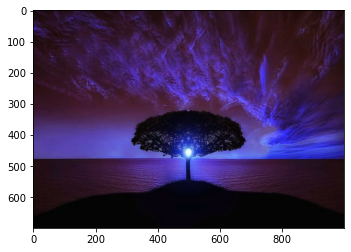

In [4]:
pt.imshow(img) #BGR FORM

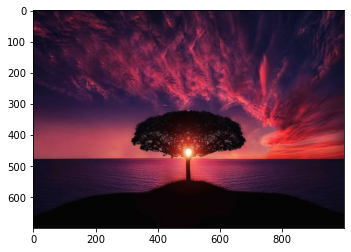

In [5]:
image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #CONVERTING TO RGB USING cv2
pt.imshow(image)

In [6]:
clicked = False
r = g = b = xpos = ypos = 0

### READING THE CSV FILE

In [7]:
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('D:\GRIP\OpenCV-Projects-master\OpenCV-Projects-master\color detection\colors.csv', names=index, header=None)             

### CREATING draw_function

In [8]:
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r= img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

### SETTING A MOUSE CALLBACK EVENT ON A WINDOW

In [9]:
cv2.namedWindow('color detection')
cv2.setMouseCallback('color detection',draw_function)

### CALCULATE DISTANCE TO GET COLOR NAME

In [10]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G-int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

### DISPLAYING IMAGE ON WINDOW

In [ ]:

while(1):
    cv2.imshow("color detection",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
            cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
            text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
            cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
            if(r+g+b>=600):
                cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
            clicked=False
        
    if cv2.waitKey(20) & 0xFF ==27:
            break
    
cv2.destroyAllWindows()
 

# THANKYOU!